In [48]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=10, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

In [49]:
X[:10]

array([[  1.13280393,   3.87673946],
       [ -9.33368654,   6.69660795],
       [  4.89600578,   6.72688421],
       [ -9.29130929,  -8.50407395],
       [  1.7190373 ,   0.71788708],
       [ -8.64571912,  -8.40630945],
       [ -0.9121084 ,   8.03919093],
       [-10.38710125,   6.9575866 ],
       [ -8.50830225,  -8.41707821],
       [ -1.68268028,   2.94596493]])

In [50]:
y

array([0, 8, 9, 7, 1, 7, 3, 8, 7, 2, 0, 9, 1, 0, 0, 9, 9, 0, 0, 1, 2, 4,
       1, 4, 5, 8, 5, 3, 0, 4, 2, 5, 9, 6, 4, 9, 8, 8, 5, 2, 8, 8, 9, 5,
       8, 4, 5, 9, 9, 5, 2, 2, 6, 0, 2, 0, 9, 7, 1, 1, 1, 3, 8, 1, 1, 4,
       8, 5, 6, 6, 3, 7, 2, 3, 6, 6, 7, 6, 9, 5, 4, 3, 5, 9, 2, 2, 7, 0,
       1, 9, 6, 3, 3, 0, 9, 1, 2, 7, 3, 3, 7, 2, 2, 7, 7, 1, 6, 4, 7, 1,
       0, 3, 4, 5, 8, 0, 5, 6, 3, 7, 0, 4, 2, 3, 3, 0, 3, 4, 4, 4, 5, 4,
       6, 8, 8, 8, 7, 1, 1, 9, 2, 5, 5, 6, 4, 7, 8, 6, 6, 6])

In [51]:
import pandas as pd

points = pd.DataFrame(X, columns=['x1', 'x2'])
points['cls'] = y
points

,x1,x2,cls
0,1.132804,3.876739,0
1,-9.333687,6.696608,8
2,4.896006,6.726884,9
3,-9.291309,-8.504074,7
4,1.719037,0.717887,1
...,...,...,...
145,-9.157370,-7.866815,7
146,-9.893789,6.626113,8
147,2.490546,8.490804,6
148,0.882919,8.338942,6


In [52]:
points['cls'].unique()

array([0, 8, 9, 7, 1, 3, 2, 4, 5, 6])

In [53]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random


def print_2D_graph(data_frame):
    classes = data_frame['cls'].unique()
    colors =  list(mcolors.CSS4_COLORS.values())
    colors.remove('#FFFFFF')


    n = len(classes)
    for i in range(n):
        cls = classes[i]
        points = data_frame[data_frame['cls'] == cls]
        plt.scatter(points['x1'], 
                    points['x2'], 
                    c=random.choice(colors), label=f"Class {cls}", marker='o')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.tight_layout()

    plt.show()

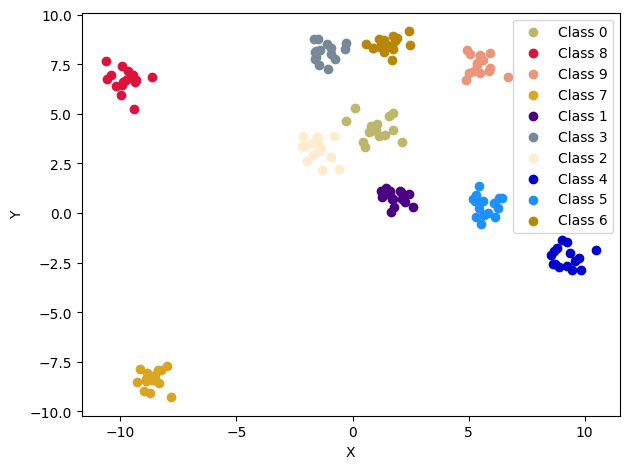

In [54]:
print_2D_graph(points)

In [55]:
from sklearn.metrics import adjusted_rand_score, v_measure_score
from sklearn.cluster import KMeans
# both metrics should return 1.0 for perfect clustering and values near 0 for very bad clustering 

In [56]:
n_clusters = [i for i in range(2, 31)]
ars = []
vms = []


y_true = y

for n in n_clusters:
  kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
  kmeans.fit(X)
  y_pred = kmeans.labels_
  ars.append(adjusted_rand_score(y_true, y_pred))
  vms.append(v_measure_score(y_true, y_pred))


print(n_clusters)
print(ars)
print(vms)



[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.09394002935625917, 0.24939852747258875, 0.3162725026473703, 0.5049833887043189, 0.6005361930294906, 0.7245841035120147, 0.8015978695073236, 0.8921071687183201, 1.0, 0.9731483150117138, 0.9393389836781524, 0.9169703906744179, 0.8774937172287549, 0.851593625498008, 0.8108306069632306, 0.8160709732514702, 0.7583603974742943, 0.7761617624415842, 0.6983606989315779, 0.7014341590612777, 0.6733911927717284, 0.6213120188588899, 0.6150512542711892, 0.5855452359624723, 0.547112462006079, 0.577999640052666, 0.5170889805539187, 0.566590336724541, 0.5282210654190105]
[0.3570493415234824, 0.566770614475168, 0.6731933360437871, 0.7904600546402082, 0.8482259045752858, 0.9007256325828685, 0.9359370254787318, 0.968962684127345, 1.0, 0.986366706153204, 0.9712344899840795, 0.9605883194737438, 0.9454793872942984, 0.9351838032376589, 0.9213974480382566, 0.9146862683093605, 0.8981305913222678, 0.89

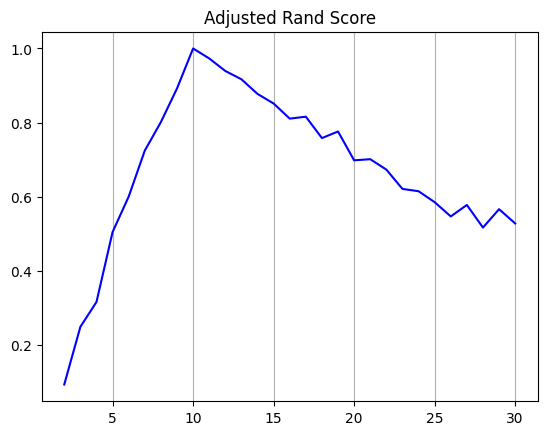

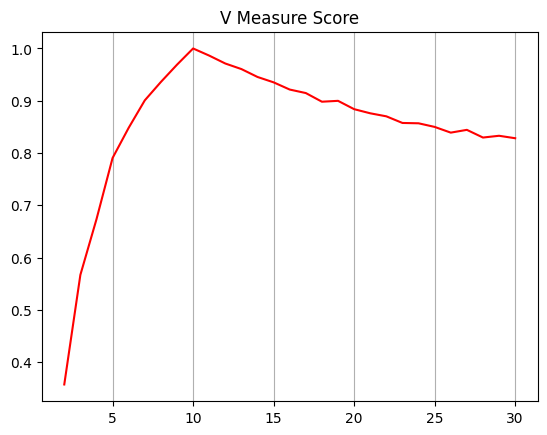

In [57]:
def elbow_graph(n_clusters, metrics_values, title='', color='b'):
  plt.plot(n_clusters, metrics_values, color=color)
  plt.title(title)
  plt.grid(axis = 'x')
  plt.show()


elbow_graph(n_clusters, ars, 'Adjusted Rand Score')
elbow_graph(n_clusters, vms, 'V Measure Score', 'r')

Sprawdziłem również wyniki dla inacze wygenerowanych danych - w przypadku tych początkowych algorytm bezbłędnie dzieli punkty na 10 klastrów. Dane nigdzie na siebie nie nachodzą, co ułatwia uzyskanie takich wyników. Punkt ten jest dobrze widoczny na wykresach, niezależnie od wybranej metody oceny klasteryzacji.  

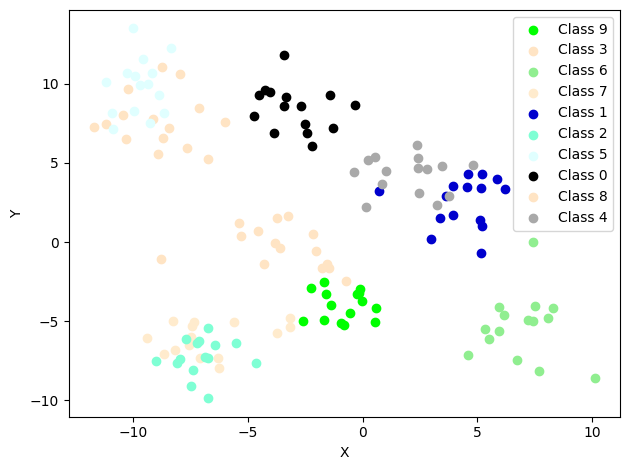

In [58]:
X2, y2 = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=10, 
                  cluster_std=1.5, 
                  shuffle=True, 
                  random_state=42)

points2 = pd.DataFrame(X2, columns=['x1', 'x2'])
points2['cls'] = y2

print_2D_graph(points2)

In [59]:
n_clusters = [i for i in range(2, 31)]
ars = []
vms = []


y_true = y2

for n in n_clusters:
  kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
  kmeans.fit(X2)
  y_pred = kmeans.labels_
  ars.append(adjusted_rand_score(y_true, y_pred))
  vms.append(v_measure_score(y_true, y_pred))


print(n_clusters)
print(ars)
print(vms)


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.14121037463976946, 0.3407079646017699, 0.36975204633133535, 0.5001293813754375, 0.6058411815776944, 0.6381798276302034, 0.667101015960849, 0.660282280756479, 0.628955221914054, 0.6248103123384529, 0.6122023467157484, 0.5655408815765106, 0.5731388244062638, 0.573653437611626, 0.5762618777131593, 0.5155657953888639, 0.5118364330582584, 0.4890153889004944, 0.4478280068921926, 0.44297578039467006, 0.40313060286234287, 0.42373568087222363, 0.38148055656336727, 0.37657490598805493, 0.4083591650199942, 0.3958794964876715, 0.3299610592278934, 0.3433377437054909, 0.3252475929827325]
[0.41934093867769545, 0.642137561217943, 0.6581537710576759, 0.7388480642711477, 0.8071739190881168, 0.8254088127426251, 0.8291104661687346, 0.8137356309834929, 0.801102035554633, 0.7935102673393093, 0.7983982247615674, 0.7769703061820818, 0.7655875961447026, 0.7772699454880299, 0.7913926029301859, 0.76150

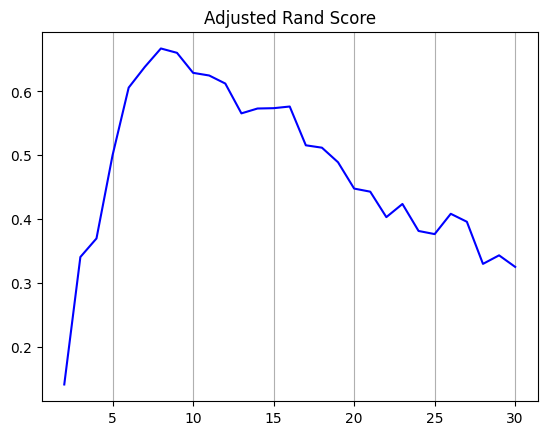

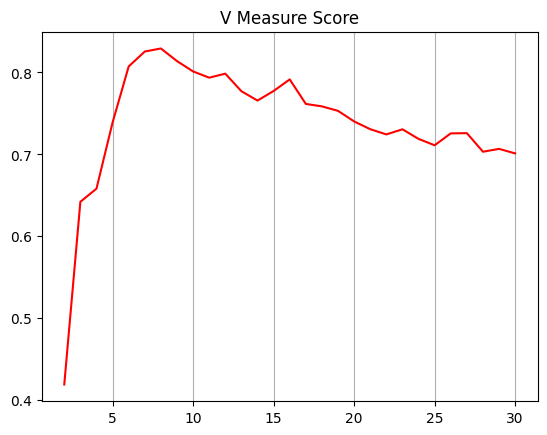

In [60]:
elbow_graph(n_clusters, ars, 'Adjusted Rand Score')
elbow_graph(n_clusters, vms, 'V Measure Score', 'r')

W tym przypadku również dobrze widać miejsce ostrzejeszego 'zgięcia' na wykresie. Nie wypada ono jednak na 10, ale na 8 klastrach.

           x1        x2  cls
21   8.615302 -2.561962    0
34   8.900878 -2.744389    0
65   8.816844 -1.772661    0
107  9.356592 -2.013654    0
121  9.239134 -1.474498    0
..        ...       ...  ...
134 -9.921836  6.456920   10
135 -9.396109  5.266101   10
136 -8.233509 -7.910039   10
145 -9.157370 -7.866815   10
146 -9.893789  6.626113   10

[150 rows x 3 columns]


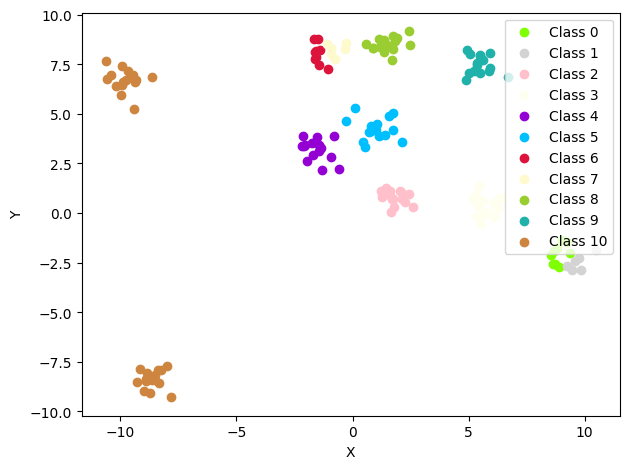

In [125]:
import numpy as np
from scipy.stats import shapiro
P = 0.5

def line_through_points(P, Q):
  x1, y1 = P
  x2, y2 = Q
  slope = (y2 - y1) / (x2 - x1) 
  y_intercept = y1 - slope * x1

  return slope, y_intercept


def project_point_on_line(point, coefs):
  slope = coefs[0]
  intercept = coefs[1]

  x_proj = (slope * point[1] + point[0] - slope * intercept) / (slope ** 2 + 1)
  y_proj = slope * x_proj + intercept

  return x_proj, y_proj


def dist_from_zero(point, coefs):
  zero_point = (-coefs[1]/coefs[0], 0)
  distance = ((point[0] - zero_point[0]) ** 2 + (point[1] - zero_point[1]) ** 2) ** 0.5
  return distance


def find_optimal_division(data, iteration=0):
  curr_points = data.copy()
  kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
  kmeans.fit(curr_points[['x1', 'x2']])
  centers = kmeans.cluster_centers_
  coefs = line_through_points(centers[0], centers[1])
  curr_points['cls'] = kmeans.labels_
  curr_points['project_x1'], curr_points['project_x2'] = project_point_on_line((curr_points['x1'], curr_points['x2']), coefs)

  curr_points['dist'] = dist_from_zero((curr_points['x1'], curr_points['x2']), coefs)
  
  
  p_val = shapiro(curr_points['dist']).pvalue

  if p_val < P and len(curr_points[curr_points['cls'] == 0]) > 5 and len(curr_points[curr_points['cls'] == 1]) > 5:
    find_optimal_division(curr_points[curr_points['cls'] == 0], iteration+1)
    find_optimal_division(curr_points[curr_points['cls'] == 1], iteration+1)   

  else:
    result = pd.DataFrame(curr_points[['x1', 'x2']])
    result['cls'] = 0
    results_arr.append(result)



results_arr = []
find_optimal_division(points)

idx = 0
for result in results_arr:
  result['cls'] = idx
  idx += 1


results = pd.concat(results_arr)
print(results)

print_2D_graph(results)


Dla parametru P = 0.5 metoda znajduje 11 klastrów. Nie pokrywają się one idealnie z początkowymi klastrami, jednak wynik nie jest zły.



 P =  0.001
           x1        x2  cls
4    1.719037  0.717887    0
12   1.428870  1.286409    0
19   2.041176  1.111830    0
21   8.615302 -2.561962    0
22   2.419813  0.962155    0
..        ...       ...  ...
134 -9.921836  6.456920    2
135 -9.396109  5.266101    2
136 -8.233509 -7.910039    2
145 -9.157370 -7.866815    2
146 -9.893789  6.626113    2

[150 rows x 3 columns]


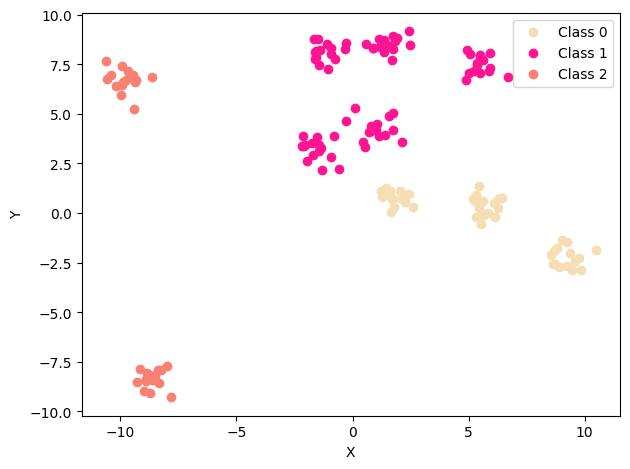



 P =  0.05
           x1        x2  cls
21   8.615302 -2.561962    0
23   9.836573 -2.871135    0
29   9.561551 -2.435319    0
34   8.900878 -2.744389    0
45   9.471259 -2.877700    0
..        ...       ...  ...
134 -9.921836  6.456920    9
135 -9.396109  5.266101    9
136 -8.233509 -7.910039    9
145 -9.157370 -7.866815    9
146 -9.893789  6.626113    9

[150 rows x 3 columns]


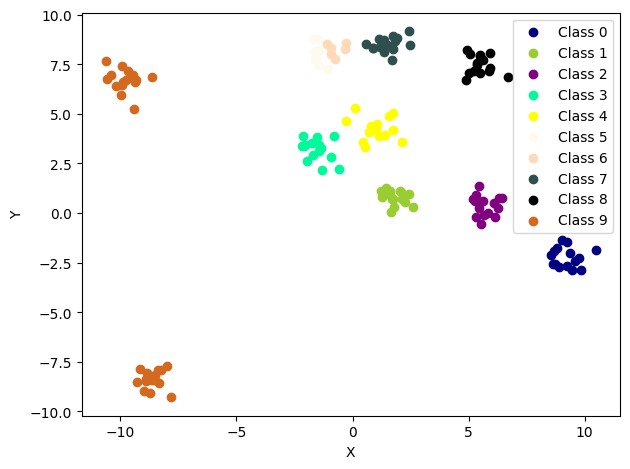



 P =  0.1
           x1        x2  cls
21   8.615302 -2.561962    0
23   9.836573 -2.871135    0
29   9.561551 -2.435319    0
34   8.900878 -2.744389    0
45   9.471259 -2.877700    0
..        ...       ...  ...
134 -9.921836  6.456920    9
135 -9.396109  5.266101    9
136 -8.233509 -7.910039    9
145 -9.157370 -7.866815    9
146 -9.893789  6.626113    9

[150 rows x 3 columns]


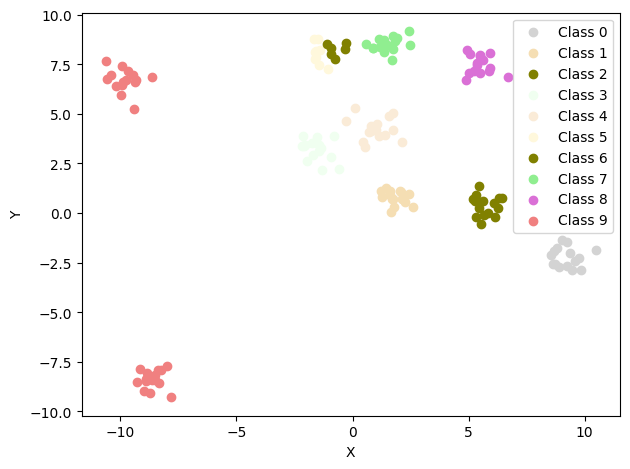



 P =  0.25
           x1        x2  cls
21   8.615302 -2.561962    0
23   9.836573 -2.871135    0
29   9.561551 -2.435319    0
34   8.900878 -2.744389    0
45   9.471259 -2.877700    0
..        ...       ...  ...
134 -9.921836  6.456920    9
135 -9.396109  5.266101    9
136 -8.233509 -7.910039    9
145 -9.157370 -7.866815    9
146 -9.893789  6.626113    9

[150 rows x 3 columns]


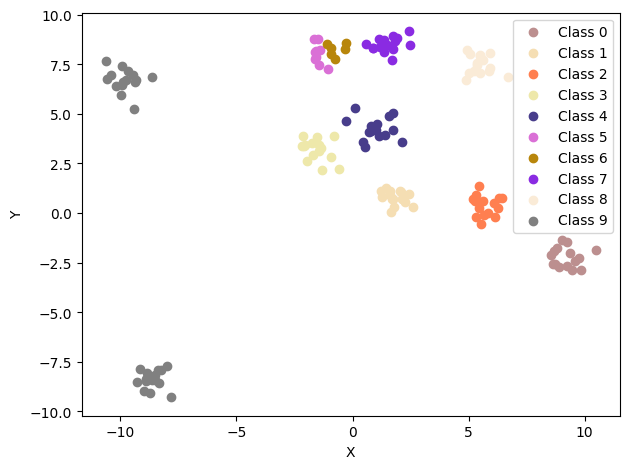



 P =  0.75
           x1        x2  cls
21   8.615302 -2.561962    0
34   8.900878 -2.744389    0
65   8.816844 -1.772661    0
107  9.356592 -2.013654    0
121  9.239134 -1.474498    0
..        ...       ...  ...
104 -8.003113 -7.717605   12
108 -8.897997 -8.456050   12
119 -8.733785 -9.095416   12
136 -8.233509 -7.910039   12
145 -9.157370 -7.866815   12

[150 rows x 3 columns]


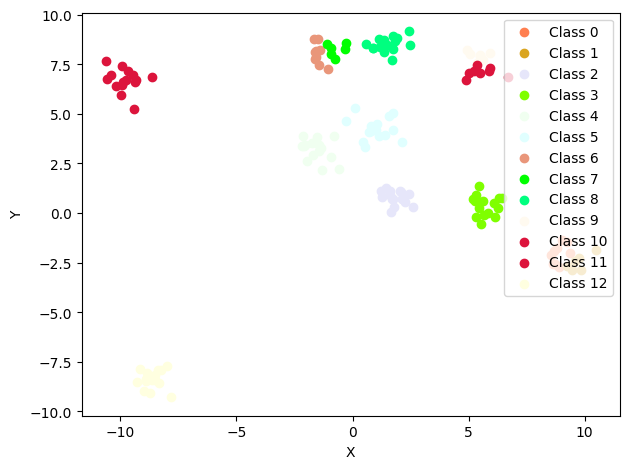

In [133]:
params = [0.001, 0.05, 0.1, 0.25, 0.75]

for param in params:
  P = param
  print("\n\n P = ", P)
  results_arr = []
  find_optimal_division(points)

  idx = 0
  for result in results_arr:
    result['cls'] = idx
    idx += 1


  results = pd.concat(results_arr)
  print(results)

  print_2D_graph(results)

Wraz ze wzrostem wartości P, zwiększa się liczba klastrów. Już ustawienie parametru P na wartość 0.05 pozwala na uzyskanie zbliżonych do oczekiwanych, chociaż nie idealnych, wyników.



 P =  0.001
            x1        x2  cls
0    -0.540454 -4.478706    0
1   -11.716485  7.283752    0
2     7.678243 -8.172292    0
3    -7.075919 -7.311904    0
4     5.136774  3.436487    0
..         ...       ...  ...
145  -0.825576 -5.214782    0
146   6.175949 -4.614764    0
147   3.624496  2.890684    0
148  -0.011700 -3.714468    0
149  -8.878454  9.288954    0

[150 rows x 3 columns]


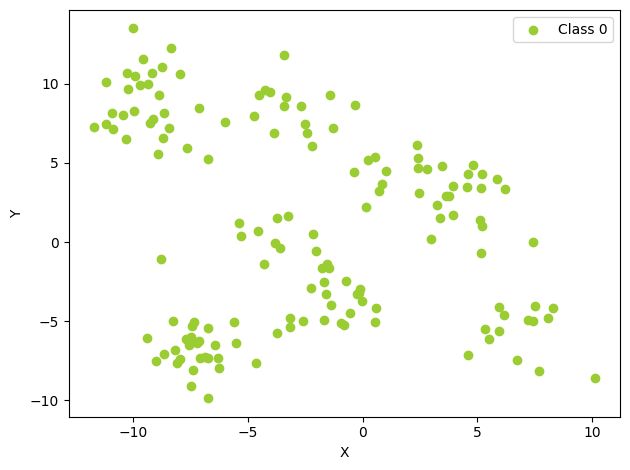



 P =  0.05
            x1        x2  cls
0    -0.540454 -4.478706    0
1   -11.716485  7.283752    0
2     7.678243 -8.172292    0
3    -7.075919 -7.311904    0
4     5.136774  3.436487    0
..         ...       ...  ...
145  -0.825576 -5.214782    0
146   6.175949 -4.614764    0
147   3.624496  2.890684    0
148  -0.011700 -3.714468    0
149  -8.878454  9.288954    0

[150 rows x 3 columns]


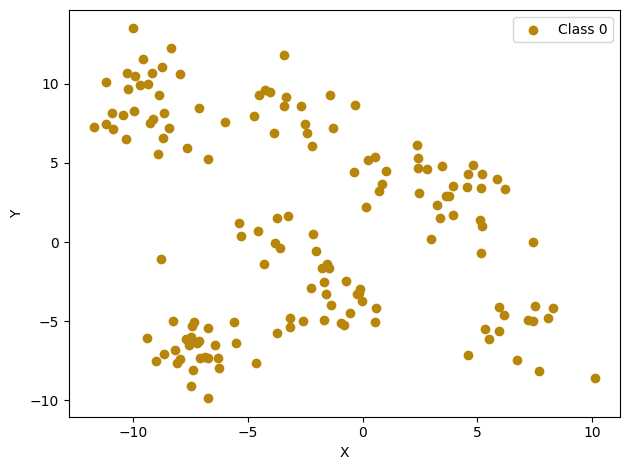



 P =  0.1
            x1        x2  cls
0    -0.540454 -4.478706    0
1   -11.716485  7.283752    0
2     7.678243 -8.172292    0
3    -7.075919 -7.311904    0
4     5.136774  3.436487    0
..         ...       ...  ...
145  -0.825576 -5.214782    0
146   6.175949 -4.614764    0
147   3.624496  2.890684    0
148  -0.011700 -3.714468    0
149  -8.878454  9.288954    0

[150 rows x 3 columns]


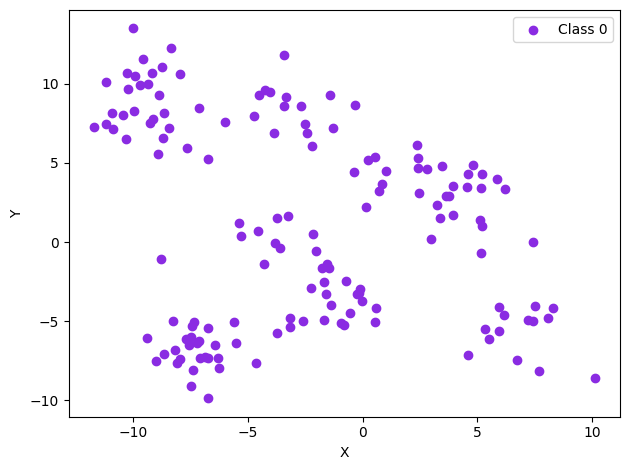



 P =  0.25
            x1        x2  cls
0    -0.540454 -4.478706    0
1   -11.716485  7.283752    0
2     7.678243 -8.172292    0
3    -7.075919 -7.311904    0
4     5.136774  3.436487    0
..         ...       ...  ...
145  -0.825576 -5.214782    0
146   6.175949 -4.614764    0
147   3.624496  2.890684    0
148  -0.011700 -3.714468    0
149  -8.878454  9.288954    0

[150 rows x 3 columns]


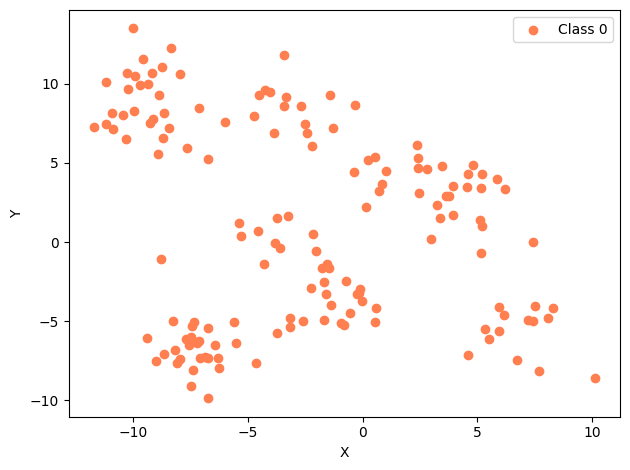



 P =  0.5
           x1        x2  cls
2    7.678243 -8.172292    0
4    5.136774  3.436487    0
5    5.940955 -4.119792    0
9    7.505189 -4.049869    0
14   4.531864  3.478469    0
..        ...       ...  ...
67  -0.310724  8.675622    8
86  -2.407905  6.877164    8
105 -1.401498  9.271339    8
125 -2.682670  8.562631    8
143 -2.529443  7.427720    8

[150 rows x 3 columns]


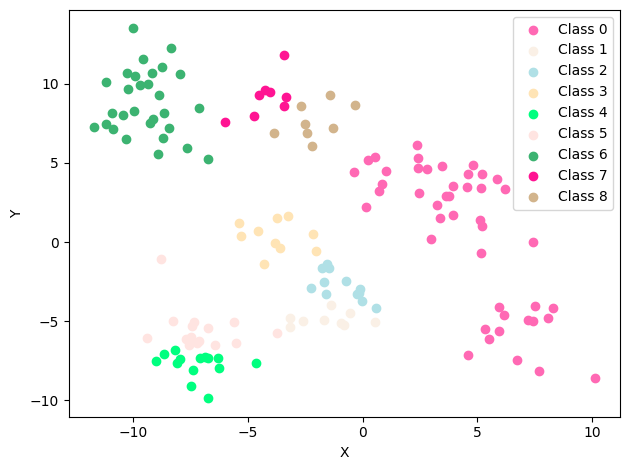



 P =  0.75
           x1        x2  cls
37   2.398040  4.681124    0
65   2.363490  6.122166    0
75   2.805213  4.606929    0
84   2.461909  3.089924    0
92   2.412124  5.334186    0
..        ...       ...  ...
67  -0.310724  8.675622   14
86  -2.407905  6.877164   14
105 -1.401498  9.271339   14
125 -2.682670  8.562631   14
143 -2.529443  7.427720   14

[150 rows x 3 columns]


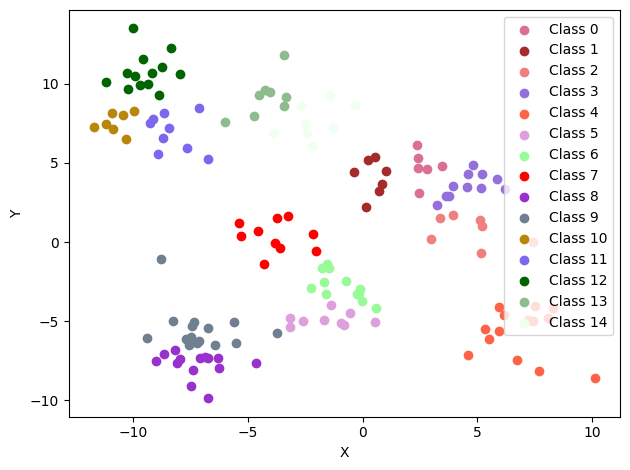



 P =  1.5
           x1        x2  cls
37   2.398040  4.681124    0
65   2.363490  6.122166    0
75   2.805213  4.606929    0
84   2.461909  3.089924    0
92   2.412124  5.334186    0
..        ...       ...  ...
67  -0.310724  8.675622   14
86  -2.407905  6.877164   14
105 -1.401498  9.271339   14
125 -2.682670  8.562631   14
143 -2.529443  7.427720   14

[150 rows x 3 columns]


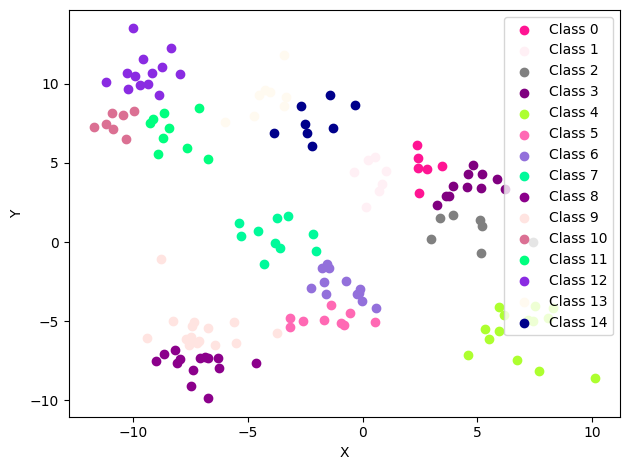

In [132]:
params = [0.001, 0.05, 0.1, 0.25, 0.5, 0.75]

for param in params:
  P = param
  print("\n\n P = ", P)
  results_arr = []
  find_optimal_division(points2)

  idx = 0
  for result in results_arr:
    result['cls'] = idx
    idx += 1


  results = pd.concat(results_arr)
  print(results)

  print_2D_graph(results)

Dla bardziej skomplikowanego przypadku również ta metoda okazuje się daleka od ideału - dobór parametru P musi być zdecydowanie bardziej ostrożny.

## Players dataset

In [186]:
players_raw = pd.read_csv('./Zadanie4-Players.csv')
players_raw

<ipython-input-186-2778dbd7fa6d>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_raw = pd.read_csv('./Zadanie4-Players.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [187]:
players_raw.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [188]:
cols_to_del = ['sofifa_id', 'nationality_id', 'club_team_id', 'preferred_foot', 'nation_position',
               'player_tags', 'player_traits', 'work_rate', 'club_joined', 'club_loaned_from', 
               'body_type', 'real_face', 'club_position', 'dob', 'player_positions']

for column in players_raw.columns:
  if 'url' in column:
    cols_to_del.append(column)
  if 'name' in column:
    cols_to_del.append(column)

cols_to_del

['sofifa_id',
 'nationality_id',
 'club_team_id',
 'preferred_foot',
 'nation_position',
 'player_tags',
 'player_traits',
 'work_rate',
 'club_joined',
 'club_loaned_from',
 'body_type',
 'real_face',
 'club_position',
 'dob',
 'player_positions',
 'player_url',
 'short_name',
 'long_name',
 'club_name',
 'league_name',
 'nationality_name',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url']

In [189]:
players = players_raw.drop(cols_to_del, axis=1)
players.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      19239 non-null  int64  
 1   potential                    19239 non-null  int64  
 2   value_eur                    19165 non-null  float64
 3   wage_eur                     19178 non-null  float64
 4   age                          19239 non-null  int64  
 5   height_cm                    19239 non-null  int64  
 6   weight_kg                    19239 non-null  int64  
 7   league_level                 19178 non-null  float64
 8   club_jersey_number           19178 non-null  float64
 9   club_contract_valid_until    19178 non-null  float64
 10  nation_team_id               759 non-null    float64
 11  nation_jersey_number         759 non-null    float64
 12  weak_foot                    19239 non-null  int64  
 13  skill_moves     

In [190]:
object_cols = list(players.select_dtypes(include=['object']).columns)
object_cols

['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

In [191]:
def add_obj_numbers(s):
  if '-' in s:
    numbers = s.split('-')
    return int(numbers[0]) - int(numbers[1])
  if '+' in s:
    numbers = s.split('+')
    return int(numbers[0]) + int(numbers[1])
  return int(s)

In [192]:
players[object_cols]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89+3,89+3,89+3,92,93,93,93,92,93,93,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,44+2,44+2,44+2,46,45,45,45,46,46+2,46+2,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
19235,45+2,45+2,45+2,47,46,46,46,47,47+2,47+2,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
19236,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2
19237,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,...,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2


In [193]:
for col in object_cols:
  players[col] = players[col].apply(add_obj_numbers)

players

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,93,78000000.0,320000.0,34,170,72,1.0,30.0,2023.0,...,67,67,67,69,64,53,53,53,64,22
1,92,92,119500000.0,270000.0,32,185,81,1.0,9.0,2023.0,...,69,69,69,67,64,63,63,63,64,22
2,91,91,45000000.0,270000.0,36,187,83,1.0,7.0,2023.0,...,62,62,62,66,63,56,56,56,63,23
3,91,91,129000000.0,270000.0,29,175,68,1.0,10.0,2025.0,...,66,66,66,70,65,53,53,53,65,23
4,91,91,125500000.0,350000.0,30,181,70,1.0,17.0,2025.0,...,83,83,83,82,78,72,72,72,78,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,180,64,1.0,36.0,2021.0,...,48,48,48,50,50,48,48,48,50,17
19235,47,59,110000.0,500.0,19,175,70,1.0,27.0,2021.0,...,48,48,48,51,50,46,46,46,50,16
19236,47,55,100000.0,500.0,21,178,72,1.0,31.0,2021.0,...,48,48,48,49,49,47,47,47,49,14
19237,47,60,110000.0,500.0,19,173,66,1.0,12.0,2021.0,...,31,31,31,35,34,28,28,28,34,17


In [194]:
print(players.isna().sum())

overall       0
potential     0
value_eur    74
wage_eur     61
age           0
             ..
lcb           0
cb            0
rcb           0
rb            0
gk            0
Length: 84, dtype: int64


In [195]:
players.dropna(axis=1, inplace=True)
players

,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,93,34,170,72,4,4,5,85,95,...,67,67,67,69,64,53,53,53,64,22
1,92,92,32,185,81,4,4,5,71,95,...,69,69,69,67,64,63,63,63,64,22
2,91,91,36,187,83,4,5,5,87,95,...,62,62,62,66,63,56,56,56,63,23
3,91,91,29,175,68,5,5,5,85,83,...,66,66,66,70,65,53,53,53,65,23
4,91,91,30,181,70,5,4,4,94,82,...,83,83,83,82,78,72,72,72,78,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,22,180,64,3,2,1,46,32,...,48,48,48,50,50,48,48,48,50,17
19235,47,59,19,175,70,3,2,1,54,33,...,48,48,48,51,50,46,46,46,50,16
19236,47,55,21,178,72,3,2,1,39,32,...,48,48,48,49,49,47,47,47,49,14
19237,47,60,19,173,66,3,2,1,29,49,...,31,31,31,35,34,28,28,28,34,17


In [196]:
n_clusters = [i for i in range(2, 31)]
inertia = []

for n in n_clusters:
  kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
  kmeans.fit(players)
  inertia.append(kmeans.inertia_)

print(inertia)

[141161843.53510085, 104155199.89694466, 76504031.18117389, 68239018.52616431, 61470890.03520824, 57908798.39972332, 55130650.526507065, 52642675.38435151, 50450088.83421953, 48348040.98911077, 46793842.098303914, 45657468.30262981, 44641658.45957501, 43672124.06965858, 42765911.34621769, 42071053.43800013, 41423693.08668776, 40811267.89635192, 40278507.62644175, 39804242.846849374, 39356009.40923899, 38881039.639799654, 38417476.94914436, 38092068.692381345, 37704027.623811975, 37307445.61936978, 37002356.11580127, 36650921.56666735, 36355972.37627137]


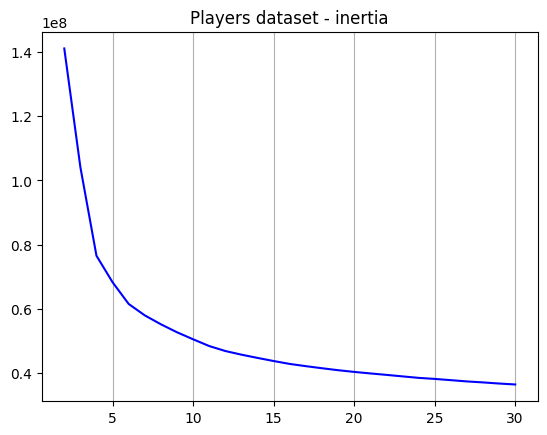

In [197]:
elbow_graph(n_clusters, inertia, "Players dataset - inertia")

Metda zdaje się dawać nalepsze efekty dla 4 lub 6 klastrów, jednak określenie tego nie jest proste.

In [199]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans.fit(players)
players['cluster'] = kmeans.labels_

players['name'] = players_raw['long_name']
players['position'] = players_raw['club_position']

players

,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,...,rwb,lb,lcb,cb,rcb,rb,gk,cluster,name,position
0,93,93,34,170,72,4,4,5,85,95,...,69,64,53,53,53,64,22,3,Lionel Andrés Messi Cuccittini,RW
1,92,92,32,185,81,4,4,5,71,95,...,67,64,63,63,63,64,22,3,Robert Lewandowski,ST
2,91,91,36,187,83,4,5,5,87,95,...,66,63,56,56,56,63,23,3,Cristiano Ronaldo dos Santos Aveiro,ST
3,91,91,29,175,68,5,5,5,85,83,...,70,65,53,53,53,65,23,3,Neymar da Silva Santos Júnior,LW
4,91,91,30,181,70,5,4,4,94,82,...,82,78,72,72,72,78,24,0,Kevin De Bruyne,RCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,22,180,64,3,2,1,46,32,...,50,50,48,48,48,50,17,2,宋德福,SUB
19235,47,59,19,175,70,3,2,1,54,33,...,51,50,46,46,46,50,16,2,Caoimhin Porter,RES
19236,47,55,21,178,72,3,2,1,39,32,...,49,49,47,47,47,49,14,2,Nathan Logue-Cunningham,RES
19237,47,60,19,173,66,3,2,1,29,49,...,35,34,28,28,28,34,17,4,Luke Rudden,RES


In [201]:
players_summary = players[['cluster', 'name', 'position']].copy()
players_summary

,cluster,name,position
0,3,Lionel Andrés Messi Cuccittini,RW
1,3,Robert Lewandowski,ST
2,3,Cristiano Ronaldo dos Santos Aveiro,ST
3,3,Neymar da Silva Santos Júnior,LW
4,0,Kevin De Bruyne,RCM
...,...,...,...
19234,2,宋德福,SUB
19235,2,Caoimhin Porter,RES
19236,2,Nathan Logue-Cunningham,RES
19237,4,Luke Rudden,RES


In [209]:
for i in range(6):
  print('\n\n cluster = ', i)
  players_in_cluster = players_summary[players_summary['cluster'] == i].copy()
  players_in_cluster = players_in_cluster[players_in_cluster['position'] != 'SUB'] #usuwamy zawodników rezerwowych
  print(players_in_cluster.head(20))
  print(players_in_cluster.describe(include='object'))




 cluster =  0
    cluster                               name position
4         0                    Kevin De Bruyne      RCM
9         0                         Harry Kane       ST
10        0                       N'Golo Kanté      RCM
14        0  Carlos Henrique Venancio Casimiro      CDM
15        0                    Virgil van Dijk      LCB
17        0                Mohamed Salah Ghaly       RW
19        0              Joshua Walter Kimmich      RDM
22        0                Sergio Ramos García      LCB
23        0           Luis Alberto Suárez Díaz       RS
24        0                         Toni Kroos      LCM
28        0      Bruno Miguel Borges Fernandes      CAM
32        0                        Luka Modrić      RCM
35        0                      Thomas Müller      CAM
37        0                         Paul Pogba      RDM
38        0                     Marco Verratti      LCM
39        0                 Marcos Aoás Corrêa      RCB
40        0            Leon Chri

Udało się uzyskać w miarę sensowny podział na klastry, w których wydzieleni są zawodnicy na określonych pozycjach (np. klaster 1 zawiera w większości bramkarzy, a w klastrze 5 dominują zawodnicy grający formacjach defensywnych w szczególności środkowa obrona).